In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배_naver_blog_992.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,953):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배_naver_blog_992.txt', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배_naver_blog_992.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 11456)	1
  (1, 7682)	1
  (2, 5109)	1
  (3, 2605)	1
  (4, 10830)	1
  (5, 5138)	1
  (6, 1568)	1
  (7, 6435)	1
  (8, 8623)	1
  (9, 3815)	1
  (10, 4610)	1
  (11, 7359)	1
  (12, 6069)	1
  (13, 31)	1
  (14, 7362)	1
  (15, 7270)	1
  (16, 8686)	1
  (17, 6587)	1
  (18, 9278)	1
  (19, 3523)	1
  (20, 5081)	1
  (21, 11891)	1
  (22, 1120)	1
  (23, 5081)	1
  (24, 9393)	1
  :	:
  (244385, 565)	1
  (244386, 9627)	1
  (244387, 5138)	1
  (244388, 9003)	1
  (244389, 565)	1
  (244390, 946)	1
  (244391, 1862)	1
  (244392, 10463)	1
  (244393, 10215)	1
  (244394, 8191)	1
  (244395, 1293)	1
  (244396, 3161)	1
  (244397, 8979)	1
  (244398, 11255)	1
  (244399, 10215)	1
  (244400, 4966)	1
  (244401, 10890)	1
  (244402, 9180)	1
  (244403, 4002)	1
  (244404, 11255)	1
  (244405, 9180)	1
  (244406, 5112)	1
  (244407, 8298)	1
  (244408, 10463)	1
  (244409, 5112)	1


In [8]:
print(vectorize.vocabulary_)

{'해외': 11456, '유명': 7682, '상보': 5109, '디케이': 2605, '팩토리': 10830, '상이': 5138, '날씨': 1568, '아침': 6435, '저녁': 8623, '바람': 3815, '불어': 4610, '외출': 7359, '시엔': 6069, '가디건': 31, '외투': 7362, '온도': 7270, '전담': 8686, '애용': 6587, '쥬스': 9278, '몬스터': 3523, '상값': 5081, '훌쩍': 11891, '그때': 1120, '지출': 9393, '저축': 8647, '살림살이': 5050, '좀처럼': 9071, '모로': 3475, '예전': 7148, '연초': 7056, '점도': 8809, '금연': 1225, '위해': 7641, '커녕': 10119, '상물욕': 5106, '뿜어져': 4890, '사람': 4920, '욕심': 7422, '점점': 8824, '사서': 4950, '보고': 4283, '입맛': 8295, '매장': 3296, '가게': 2, '가격': 3, '달라': 2011, '때문': 2648, '스트레스': 5922, '친구': 10024, '사고': 4906, '콧노래': 10248, '배신': 4055, '직구': 9414, '몇번': 3454, '부탁': 4502, '무니': 3561, '격감': 478, '전혀': 8773, '마치': 3143, '콜라': 10234, '느낌': 1842, '국내': 1005, '온라인': 7271, '쇼핑몰': 5663, '한참': 11370, '마음': 3112, '성애자': 5421, '상전': 5146, '실패': 6223, '거듭': 352, '지라': 9346, '처음': 9694, '크게': 10287, '주문': 9145, '제품': 8979, '정말': 8866, '인지': 8135, '정보': 8874, '공유': 783, '후기': 11853, '모드': 3468, '한번': 11341, 

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'해외': 137,
 '유명': 28,
 '상보': 1,
 '디케이': 21,
 '팩토리': 82,
 '상이': 411,
 '날씨': 116,
 '아침': 55,
 '저녁': 48,
 '바람': 35,
 '불어': 11,
 '외출': 27,
 '시엔': 2,
 '가디건': 2,
 '외투': 6,
 '온도': 464,
 '전담': 273,
 '애용': 39,
 '쥬스': 281,
 '몬스터': 564,
 '상값': 2,
 '훌쩍': 6,
 '그때': 67,
 '지출': 32,
 '저축': 1,
 '살림살이': 1,
 '좀처럼': 6,
 '모로': 34,
 '예전': 169,
 '연초': 1092,
 '점도': 55,
 '금연': 865,
 '위해': 375,
 '커녕': 3,
 '상물욕': 1,
 '뿜어져': 9,
 '사람': 702,
 '욕심': 22,
 '점점': 87,
 '사서': 32,
 '보고': 360,
 '입맛': 60,
 '매장': 1076,
 '가게': 143,
 '가격': 579,
 '달라': 68,
 '때문': 1652,
 '스트레스': 101,
 '친구': 405,
 '사고': 55,
 '콧노래': 1,
 '배신': 3,
 '직구': 47,
 '몇번': 46,
 '부탁': 7,
 '무니': 3,
 '격감': 229,
 '전혀': 255,
 '마치': 123,
 '콜라': 13,
 '느낌': 990,
 '국내': 294,
 '온라인': 205,
 '쇼핑몰': 85,
 '한참': 36,
 '마음': 496,
 '성애자': 2,
 '상전': 1,
 '실패': 30,
 '거듭': 6,
 '지라': 7,
 '처음': 672,
 '크게': 185,
 '주문': 263,
 '제품': 3584,
 '정말': 1404,
 '인지': 39,
 '정보': 304,
 '공유': 23,
 '후기': 173,
 '모드': 1396,
 '한번': 672,
 '집중': 23,
 '보이시': 12,
 '나용': 1,
 '해저': 2,
 '쭙쭙': 1,
 '정리': 45

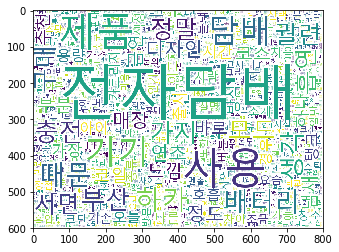

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'해외': 11456, '유명': 7682, '상보': 5109, '디케이': 2605, '팩토리': 10830, '상이': 5138, '날씨': 1568, '아침': 6435, '저녁': 8623, '바람': 3815, '불어': 4610, '외출': 7359, '시엔': 6069, '가디건': 31, '외투': 7362, '온도': 7270, '전담': 8686, '애용': 6587, '쥬스': 9278, '몬스터': 3523, '상값': 5081, '훌쩍': 11891, '그때': 1120, '지출': 9393, '저축': 8647, '살림살이': 5050, '좀처럼': 9071, '모로': 3475, '예전': 7148, '연초': 7056, '점도': 8809, '금연': 1225, '위해': 7641, '커녕': 10119, '상물욕': 5106, '뿜어져': 4890, '사람': 4920, '욕심': 7422, '점점': 8824, '사서': 4950, '보고': 4283, '입맛': 8295, '매장': 3296, '가게': 2, '가격': 3, '달라': 2011, '때문': 2648, '스트레스': 5922, '친구': 10024, '사고': 4906, '콧노래': 10248, '배신': 4055, '직구': 9414, '몇번': 3454, '부탁': 4502, '무니': 3561, '격감': 478, '전혀': 8773, '마치': 3143, '콜라': 10234, '느낌': 1842, '국내': 1005, '온라인': 7271, '쇼핑몰': 5663, '한참': 11370, '마음': 3112, '성애자': 5421, '상전': 5146, '실패': 6223, '거듭': 352, '지라': 9346, '처음': 9694, '크게': 10287, '주문': 9145, '제품': 8979, '정말': 8866, '인지': 8135, '정보': 8874, '공유': 783, '후기': 11853, '모드': 3468, '한번': 11341, 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('전자담배', 10615.0)
('사용', 4387.0)
('제품', 3584.0)
('기기', 2485.0)
('담배', 2342.0)
('때문', 1652.0)
('하카', 1576.0)
('배터리', 1553.0)
('생각', 1504.0)
('부산', 1470.0)
('충전', 1430.0)
('정말', 1404.0)
('가지', 1403.0)
('모드', 1396.0)
('궐련', 1375.0)
('흡연', 1360.0)
('구매', 1354.0)
('서면', 1247.0)
('디자인', 1172.0)
('연초', 1092.0)
('매장', 1076.0)
('정도', 1070.0)
('코스', 1041.0)
('느낌', 990.0)
('냄새', 989.0)
('부분', 933.0)
('코일', 913.0)
('바로', 900.0)
('하나', 890.0)
('추천', 889.0)
('금연', 865.0)
('가장', 849.0)
('시간', 847.0)
('탱크', 825.0)
('방식', 818.0)
('출시', 815.0)
('용량', 815.0)
('호흡', 798.0)
('아이', 779.0)
('오늘', 769.0)
('경우', 767.0)
('다른', 762.0)
('카트리지', 740.0)
('기존', 704.0)
('청소', 704.0)
('사람', 702.0)
('처음', 672.0)
('한번', 672.0)
('소개', 658.0)
('요즘', 650.0)
('색상', 644.0)
('버튼', 632.0)
('종류', 621.0)
('이프', 612.0)
('블랙', 604.0)
('기능', 602.0)
('차이', 594.0)
('조금', 592.0)
('일반', 590.0)
('니코틴', 584.0)
('가격', 579.0)
('지금', 572.0)
('인기', 566.0)
('몬스터', 564.0)
('방문', 559.0)
('흡입', 546.0)
('설명', 545.0)
('선택', 539.0)
('또한', 534.0)
('

('조카', 24.0)
('각자', 24.0)
('행동', 24.0)
('함유량', 24.0)
('위주', 24.0)
('상대', 24.0)
('최종', 24.0)
('동료', 24.0)
('도구', 24.0)
('감사', 24.0)
('잔소리', 24.0)
('배려', 24.0)
('간다', 24.0)
('자마자', 24.0)
('고가', 24.0)
('분도', 24.0)
('노출', 24.0)
('일부', 24.0)
('채택', 24.0)
('유니크', 24.0)
('케이크', 24.0)
('논현역', 24.0)
('이태원역', 24.0)
('히팅젠더', 24.0)
('캡슐', 24.0)
('선정', 24.0)
('아드레날린', 24.0)
('초이스', 24.0)
('긍정', 24.0)
('그네', 24.0)
('바텀', 24.0)
('벺췩', 24.0)
('액정', 24.0)
('구성은', 24.0)
('럭스킷', 24.0)
('빅풋', 24.0)
('창고', 24.0)
('화성', 24.0)
('쿠키', 24.0)
('공유', 23.0)
('집중', 23.0)
('광고', 23.0)
('메론', 23.0)
('사면', 23.0)
('매년', 23.0)
('한편', 23.0)
('영화', 23.0)
('면서', 23.0)
('강조', 23.0)
('대고', 23.0)
('믿음', 23.0)
('본격', 23.0)
('수동', 23.0)
('일일이', 23.0)
('두께', 23.0)
('나기', 23.0)
('단위', 23.0)
('와이어', 23.0)
('인지도', 23.0)
('과거', 23.0)
('한쪽', 23.0)
('아버지', 23.0)
('용도', 23.0)
('단지', 23.0)
('가시', 23.0)
('더블', 23.0)
('타가', 23.0)
('레시', 23.0)
('대기', 23.0)
('스프', 23.0)
('파란색', 23.0)
('파라', 23.0)
('대구', 23.0)
('욕심', 22.0)
('고향', 22.0)
('비롯

('크리미', 11.0)
('알림', 11.0)
('반대편', 11.0)
('비틀킷', 11.0)
('정점', 11.0)
('반려동물', 11.0)
('미디어', 11.0)
('리퍼블릭', 11.0)
('리브', 11.0)
('힉스', 11.0)
('남산동', 11.0)
('범어사', 11.0)
('벤트', 11.0)
('부천', 11.0)
('적립', 11.0)
('기여', 11.0)
('파이톤', 11.0)
('버서커', 11.0)
('탑사', 11.0)
('파이리', 11.0)
('복합', 10.0)
('작품', 10.0)
('정부', 10.0)
('노릇', 10.0)
('기운', 10.0)
('현저', 10.0)
('편안함', 10.0)
('대의', 10.0)
('어버이날', 10.0)
('장기', 10.0)
('초보', 10.0)
('자제', 10.0)
('구석', 10.0)
('폭주', 10.0)
('이슈', 10.0)
('대하', 10.0)
('구형', 10.0)
('고저', 10.0)
('오기', 10.0)
('하라', 10.0)
('밀폐', 10.0)
('네가지', 10.0)
('동기', 10.0)
('가나', 10.0)
('표정', 10.0)
('환불', 10.0)
('스모커', 10.0)
('담뱃갑', 10.0)
('절연', 10.0)
('고통', 10.0)
('흥미', 10.0)
('시일', 10.0)
('통과', 10.0)
('새로이', 10.0)
('도깨비', 10.0)
('리도', 10.0)
('매드', 10.0)
('프렌치', 10.0)
('해외여행', 10.0)
('화상', 10.0)
('맥주', 10.0)
('려고', 10.0)
('흐름', 10.0)
('책임', 10.0)
('도장', 10.0)
('증서', 10.0)
('살살', 10.0)
('만이', 10.0)
('업무', 10.0)
('수록', 10.0)
('구체', 10.0)
('짐작', 10.0)
('가슴', 10.0)
('규격', 10.0)
('이상은', 10.0)


('정직', 5.0)
('킷트', 5.0)
('내뿜는', 5.0)
('글리콜', 5.0)
('고충', 5.0)
('보편화', 5.0)
('와인', 5.0)
('로블로', 5.0)
('날때', 5.0)
('요전', 5.0)
('상임', 5.0)
('마우스', 5.0)
('밀면', 5.0)
('취소', 5.0)
('우위', 5.0)
('왕산로', 5.0)
('율도', 5.0)
('진리', 5.0)
('혈액', 5.0)
('더위', 5.0)
('솔솔', 5.0)
('버릇', 5.0)
('폴리머', 5.0)
('울트라', 5.0)
('여가', 5.0)
('전극', 5.0)
('삼성', 5.0)
('경로', 5.0)
('전지', 5.0)
('통로', 5.0)
('상업', 5.0)
('대면', 5.0)
('스타트', 5.0)
('폐업', 5.0)
('승부', 5.0)
('요요', 5.0)
('아메리카노', 5.0)
('글루건', 5.0)
('정동', 5.0)
('실질', 5.0)
('검토', 5.0)
('프렛', 5.0)
('포지션', 5.0)
('마약', 5.0)
('막대기', 5.0)
('유심', 5.0)
('지장', 5.0)
('뜻밖', 5.0)
('메뉴', 5.0)
('엄선', 5.0)
('설자리', 5.0)
('리트', 5.0)
('위브', 5.0)
('키드', 5.0)
('실력', 5.0)
('오비스', 5.0)
('과전압', 5.0)
('지난달', 5.0)
('도구로', 5.0)
('초량', 5.0)
('터키', 5.0)
('카피', 5.0)
('파차', 5.0)
('베타', 5.0)
('커리', 5.0)
('마제스틱', 5.0)
('일드', 5.0)
('양재', 5.0)
('미각', 5.0)
('패드', 5.0)
('충돌', 5.0)
('하위', 5.0)
('위원회', 5.0)
('연합뉴스', 5.0)
('주일', 5.0)
('사상', 5.0)
('중상', 5.0)
('개최', 5.0)
('후속', 5.0)
('찍기', 5.0)
('상남자', 5.0)
('

('에그자일', 3.0)
('장바구니', 3.0)
('갱스터', 3.0)
('구글', 3.0)
('칼날', 3.0)
('두개골', 3.0)
('스페이스', 3.0)
('홀링', 3.0)
('소울메이트', 3.0)
('해피', 3.0)
('체이서', 3.0)
('디알', 3.0)
('숙성', 3.0)
('신고', 3.0)
('무사', 3.0)
('검문', 3.0)
('파타야', 3.0)
('충청북도', 3.0)
('킷앞', 3.0)
('인적', 3.0)
('젝팟', 3.0)
('스무', 3.0)
('신도시', 3.0)
('라이더', 3.0)
('고이', 3.0)
('궁극', 3.0)
('호조', 3.0)
('분기', 3.0)
('호빵', 3.0)
('평상시', 3.0)
('더니', 3.0)
('한길', 3.0)
('캐스케이드', 3.0)
('해안', 3.0)
('평원', 3.0)
('남쪽', 3.0)
('고대', 3.0)
('마라톤', 3.0)
('재송동', 3.0)
('앞베', 3.0)
('리미', 3.0)
('티드', 3.0)
('발라', 3.0)
('잼몬', 3.0)
('듬뿍', 3.0)
('마리아', 3.0)
('체급', 3.0)
('스트랩', 3.0)
('다락방', 3.0)
('안내서', 3.0)
('자성', 3.0)
('과육', 3.0)
('안락', 3.0)
('트리니티', 3.0)
('베이트', 3.0)
('나오니', 3.0)
('만만', 3.0)
('비카', 3.0)
('쉬폰케익', 3.0)
('신중', 3.0)
('솔드아웃', 3.0)
('발산역', 3.0)
('스킨스', 3.0)
('닉네임', 3.0)
('필라멘트', 3.0)
('위례', 3.0)
('시안', 3.0)
('레포트', 3.0)
('마티니', 3.0)
('영등포구', 3.0)
('원주', 3.0)
('부평', 3.0)
('시엔', 2.0)
('가디건', 2.0)
('상값', 2.0)
('성애자', 2.0)
('해저', 2.0)
('간소화', 2.0)
('장도', 2.0)
('설사'

('튜닝할', 2.0)
('누락', 2.0)
('맥심', 2.0)
('초심', 2.0)
('정보공', 2.0)
('추리', 2.0)
('꿀꺽', 2.0)
('었다', 2.0)
('생명력', 2.0)
('사골', 2.0)
('끝장', 2.0)
('리진', 2.0)
('킷들', 2.0)
('압승', 2.0)
('꼽으라', 2.0)
('답지', 2.0)
('나야', 2.0)
('족족', 2.0)
('명실', 2.0)
('개도', 2.0)
('죙일', 2.0)
('그레이드', 2.0)
('꼼수', 2.0)
('당부', 2.0)
('샤오미', 2.0)
('스탠', 2.0)
('천장', 2.0)
('몇장', 2.0)
('열매', 2.0)
('양면', 2.0)
('정의', 2.0)
('몸부림', 2.0)
('골절', 2.0)
('청와대', 2.0)
('진료', 2.0)
('측은', 2.0)
('진과', 2.0)
('그루밍', 2.0)
('편평', 2.0)
('생존', 2.0)
('리벳', 2.0)
('발행', 2.0)
('이학범', 2.0)
('임상수', 2.0)
('실효', 2.0)
('논의', 2.0)
('강릉', 2.0)
('업주', 2.0)
('계약서', 2.0)
('선천성', 2.0)
('식분', 2.0)
('사죄', 2.0)
('동물보호법', 2.0)
('위반', 2.0)
('번식', 2.0)
('경계', 2.0)
('비위생적', 2.0)
('충만', 2.0)
('텍스트', 2.0)
('시피', 2.0)
('북동', 2.0)
('미려', 2.0)
('초코우유', 2.0)
('패딩', 2.0)
('엣지', 2.0)
('궐렬', 2.0)
('돗자리', 2.0)
('껌맛', 2.0)
('개미지옥', 2.0)
('서론', 2.0)
('미사여구', 2.0)
('능동', 2.0)
('본론', 2.0)
('신혼집', 2.0)
('라스베이거스', 2.0)
('옆모습', 2.0)
('텁텁하', 2.0)
('열쇠', 2.0)
('사람과', 2.0)
('이용도', 2.0)
('죠오

('한시각', 1.0)
('시공간', 1.0)
('함박', 1.0)
('슬금슬금', 1.0)
('소심', 1.0)
('듭니다또', 1.0)
('도방', 1.0)
('서모', 1.0)
('카페나', 1.0)
('타깃', 1.0)
('수백', 1.0)
('또래', 1.0)
('리그', 1.0)
('갈래', 1.0)
('것외', 1.0)
('호전', 1.0)
('화두', 1.0)
('문구로', 1.0)
('그릴', 1.0)
('난생', 1.0)
('장임', 1.0)
('등사', 1.0)
('친철', 1.0)
('매점', 1.0)
('장문', 1.0)
('상부상조', 1.0)
('도마', 1.0)
('땅치', 1.0)
('분은', 1.0)
('똥꾸', 1.0)
('요망', 1.0)
('중일', 1.0)
('등각', 1.0)
('쿱쿱', 1.0)
('뭐해', 1.0)
('수지구', 1.0)
('쩌기', 1.0)
('시력', 1.0)
('스윗', 1.0)
('멍시', 1.0)
('슬쩍슬쩍', 1.0)
('늠늠', 1.0)
('짚팟', 1.0)
('호다닥', 1.0)
('라이즌', 1.0)
('의인', 1.0)
('호일', 1.0)
('수만', 1.0)
('로되', 1.0)
('다애', 1.0)
('시쥴', 1.0)
('삼대', 1.0)
('여섯', 1.0)
('실생활', 1.0)
('해로움', 1.0)
('컵라면', 1.0)
('점일', 1.0)
('일순간', 1.0)
('한밤중', 1.0)
('장선', 1.0)
('열전달', 1.0)
('어지럼증', 1.0)
('감쪽', 1.0)
('후직', 1.0)
('접눈', 1.0)
('막론', 1.0)
('슬링', 1.0)
('누님', 1.0)
('인복', 1.0)
('베젤', 1.0)
('히팅젠더안', 1.0)
('애프터서비스', 1.0)
('안드로메다', 1.0)
('부붐', 1.0)
('인내', 1.0)
('두두', 1.0)
('히팅후', 1.0)
('포스트잇', 1.0)
('벤다', 1.0)
('불타', 1.0)
('충실

('다예', 1.0)
('파격', 1.0)
('강하니', 1.0)
('수식', 1.0)
('호흡계', 1.0)
('박싱입니', 1.0)
('유념', 1.0)
('쁘띠', 1.0)
('인분', 1.0)
('뚜깡', 1.0)
('정보기술', 1.0)
('급성', 1.0)
('증권', 1.0)
('추산', 1.0)
('흑역사', 1.0)
('원소', 1.0)
('오가면', 1.0)
('회귀', 1.0)
('도선', 1.0)
('일어난다', 1.0)
('비정상', 1.0)
('촘촘하', 1.0)
('언다', 1.0)
('외벽', 1.0)
('막도', 1.0)
('산화물', 1.0)
('황화물', 1.0)
('이동성', 1.0)
('공유결합', 1.0)
('골격', 1.0)
('배열', 1.0)
('양이온', 1.0)
('상영', 1.0)
('도체', 1.0)
('평가원', 1.0)
('변혁', 1.0)
('유망', 1.0)
('천적', 1.0)
('저장장치', 1.0)
('동준', 1.0)
('텔레', 1.0)
('부사관', 1.0)
('군생활', 1.0)
('반납', 1.0)
('훈련기', 1.0)
('악플', 1.0)
('개인정보', 1.0)
('마진', 1.0)
('말투', 1.0)
('퇴소', 1.0)
('긴지', 1.0)
('도태', 1.0)
('된느', 1.0)
('자본주의', 1.0)
('재삼', 1.0)
('워토', 1.0)
('포사', 1.0)
('빌드해', 1.0)
('사춘기', 1.0)
('삼분', 1.0)
('차일피일', 1.0)
('가치나', 1.0)
('장해', 1.0)
('선봉', 1.0)
('제등', 1.0)
('사나', 1.0)
('압살', 1.0)
('청명', 1.0)
('용두', 1.0)
('라임에이드', 1.0)
('가신', 1.0)
('수요일', 1.0)
('미고', 1.0)
('용비', 1.0)
('대장님', 1.0)
('공룡', 1.0)
('스퀑크모드', 1.0)
('렛츠궈궈', 1.0)
('요크', 1.0)
('기병', 1.

('그롬', 1.0)
('공교', 1.0)
('때앞전', 1.0)
('뺑반', 1.0)
('뿜어본', 1.0)
('매스', 1.0)
('핏츠', 1.0)
('라나', 1.0)
('석촌호수', 1.0)
('꽃놀이', 1.0)
('글귀', 1.0)
('겨자', 1.0)
('액삭', 1.0)
('수기', 1.0)
('덕이', 1.0)
('이애', 1.0)
('라그', 1.0)
('때무넹', 1.0)
('자작', 1.0)
('쐐기', 1.0)
('탕진', 1.0)
('폐쇄적', 1.0)
('축적', 1.0)
('화목', 1.0)
('하루아침', 1.0)
('유요', 1.0)
('히팅재로', 1.0)
('노스', 1.0)
('킨존', 1.0)
('갑지', 1.0)
('인제', 1.0)
('생때', 1.0)
('캘리그래피', 1.0)
('토론', 1.0)
('문화인', 1.0)
('기지', 1.0)
('꼽습니', 1.0)
('무제한', 1.0)
('해갈', 1.0)
('전복', 1.0)
('밴딩', 1.0)
('사이사이', 1.0)
('뽀족공벽', 1.0)
('은창', 1.0)
('쩜쩜', 1.0)
('온몸', 1.0)
('뒷쪽', 1.0)
('편할둣', 1.0)
('번거운', 1.0)
('직역', 1.0)
('압구정로', 1.0)
('압구정로데오역', 1.0)
('각양', 1.0)
('블탱', 1.0)
('매경', 1.0)
('인증서', 1.0)
('탱탱', 1.0)
('지탱', 1.0)
('단물', 1.0)
('변덕', 1.0)
('젖소', 1.0)
('은킷', 1.0)
('조여', 1.0)
('파전', 1.0)
('우체국', 1.0)
('체국', 1.0)
('특이점', 1.0)
('오구', 1.0)
('히팅된', 1.0)
('출격', 1.0)
('전자신문', 1.0)
('투자자', 1.0)
('상항', 1.0)
('핑퐁', 1.0)
('수소차', 1.0)
('강판', 1.0)
('이평', 1.0)
('밀집', 1.0)
('거래량', 1.0)
('제지', 1.0)
(

('입국심사', 1.0)
('여권', 1.0)
('핸펀', 1.0)
('관직', 1.0)
('북경', 1.0)
('중국역사', 1.0)
('불온서적', 1.0)
('당한', 1.0)
('태국인', 1.0)
('문하', 1.0)
('불심검문', 1.0)
('비릿', 1.0)
('앙금', 1.0)
('존맛탱', 1.0)
('마이티', 1.0)
('흡입압등', 1.0)
('쥬빌레', 1.0)
('고칼로리', 1.0)
('능가', 1.0)
('유피', 1.0)
('간곳', 1.0)
('외정', 1.0)
('사모님', 1.0)
('컬로', 1.0)
('돔으', 1.0)
('뽀족공병', 1.0)
('졋습', 1.0)
('듭니다타', 1.0)
('솔찍', 1.0)
('엠펭입니', 1.0)
('엠펭베이비킷', 1.0)
('볼드', 1.0)
('다도', 1.0)
('스냅', 1.0)
('영롱', 1.0)
('및역', 1.0)
('동공', 1.0)
('지진', 1.0)
('흑자', 1.0)
('땟갈좀', 1.0)
('진패', 1.0)
('뒤액', 1.0)
('변종', 1.0)
('질타', 1.0)
('앨리스', 1.0)
('양철통', 1.0)
('뻥티기', 1.0)
('수택동', 1.0)
('친추', 1.0)
('맛위', 1.0)
('팩액', 1.0)
('볼부', 1.0)
('또또', 1.0)
('홀릭입니', 1.0)
('빨래', 1.0)
('아세트알데하이드', 1.0)
('프로모션', 1.0)
('붐액', 1.0)
('진맛', 1.0)
('귤맛액', 1.0)
('임박', 1.0)
('얄쌍', 1.0)
('얄상', 1.0)
('탄수화물', 1.0)
('팟당', 1.0)
('서명', 1.0)
('전전', 1.0)
('기타등등', 1.0)
('미시', 1.0)
('글씨체', 1.0)
('따리', 1.0)
('경대병원', 1.0)
('다대', 1.0)
('블링', 1.0)
('블링꼭', 1.0)
('원스톱', 1.0)
('서해', 1.0)
('대교', 1.0)
('좌회전', 1.0)

('사오', 1.0)
('접압', 1.0)
('가약', 1.0)
('워크맨', 1.0)
('살모사', 1.0)
('미니모', 1.0)
('작렬', 1.0)
('딴지', 1.0)
('사절', 1.0)
('해짐', 1.0)
('빨때빨릴때', 1.0)
('고함', 1.0)
('빨릴때', 1.0)
('분출', 1.0)
('변비', 1.0)
('후목', 1.0)
('빨때', 1.0)
('정강이', 1.0)
('전립선', 1.0)
('눌때', 1.0)
('요술', 1.0)
('하미', 1.0)
('꿈치', 1.0)
('우울증', 1.0)
('모란', 1.0)
('입호', 1.0)
('권위', 1.0)
('징검', 1.0)
('가디언', 1.0)
('최후', 1.0)
('묵직핫', 1.0)
('길병원', 1.0)
('뒤편', 1.0)
('가수', 1.0)
('권지용', 1.0)
('셋팅해', 1.0)
('은병', 1.0)
('난뒤', 1.0)
('티끌', 1.0)
('태산', 1.0)
('배향', 1.0)
('쇼크', 1.0)
('한요', 1.0)
('가부', 1.0)
('저느', 1.0)
('아작', 1.0)
('콤달콤란', 1.0)
('수퍼', 1.0)
('이랫던', 1.0)
('밀리터리', 1.0)
('있쟈', 1.0)
('글챠뉴', 1.0)
('그쥬', 1.0)
('장내', 1.0)
('갑슙', 1.0)
('오사', 1.0)
('괜춘괜춘', 1.0)
('불변', 1.0)
('요호', 1.0)
('제작사', 1.0)
('실측샷', 1.0)
('복지', 1.0)
('대우', 1.0)
('망년', 1.0)
('온갖', 1.0)
('도검', 1.0)
('착색', 1.0)
('향수병', 1.0)
('사별', 1.0)
('망망대해', 1.0)
('비씨카드', 1.0)
('격주', 1.0)
('달성군', 1.0)
('다사읍', 1.0)
('선로', 1.0)
('황금', 1.0)
('병따개', 1.0)
('오프너', 1.0)
('속담', 1.0)
('체형', 1.0)
('립감',

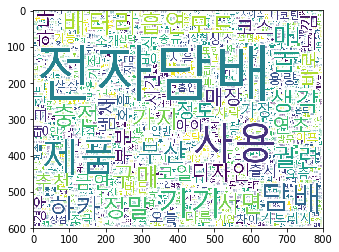

In [15]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')